# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Understanding the Business Problem
TalkingData is a Chinese big data company, and one of their areas of expertise is mobile advertisements.

In mobile advertisements, click fraud is a major source of losses. Click fraud is the practice of repeatedly clicking on an advertisement hosted on a website with the intention of generating revenue for the host website or draining revenue from the advertiser.

In this case, TalkingData happens to be serving the advertisers (their clients). TalkingData cover a whopping approx. 70% of the active mobile devices in China, of which 90% are potentially fraudulent (i.e. the user is actually not going to download the app after clicking).

You can imagine the amount of money they can help clients save if they are able to predict whether a given click is fraudulent (or equivalently, whether a given click will result in a download).

Their current approach to solve this problem is that they've generated a blacklist of IP addresses - those IPs which produce lots of clicks, but never install any apps. Now, they want to try some advanced techniques to predict the probability of a click being genuine/fraud.

In this problem, we will use the features associated with clicks, such as IP address, operating system, device type, time of click etc. to predict the probability of a click being fraud.

They have released the problem on Kaggle here..

# The data contains observations of about 240 million clicks, and whether a given click resulted in a download or not (1/0).

On Kaggle, the data is split into train.csv and train_sample.csv (100,000 observations). We'll use the smaller train_sample.csv in this notebook for speed, though while training the model for Kaggle submissions, the full training data will obviously produce better results.

The detailed data dictionary is mentioned here:

ip: ip address of click.
app: app id for marketing.
device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
os: os version id of user mobile phone
channel: channel id of mobile ad publisher
click_time: timestamp of click (UTC)
attributed_time: if user download the app for after clicking an ad, this is the time of the app download
is_attributed: the target that is to be predicted, indicating the app was downloaded

In [2]:
df=pd.read_csv(r'C:\Users\saura\Downloads\train_sample.csv')

In [3]:
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [4]:
df.shape

(100000, 8)

In [5]:
#find null value

df.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [6]:
#show percentage of null value

len(df)

100000

In [7]:
per_data=df.isnull().sum()/len(df)*100

In [8]:
per_data

ip                  0.000
app                 0.000
device              0.000
os                  0.000
channel             0.000
click_time          0.000
attributed_time    99.773
is_attributed       0.000
dtype: float64

In [9]:
# null value of attributed time is 99% so we can dlt this columns
df=df.drop('attributed_time',axis=1)

In [10]:
df.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

<AxesSubplot:>

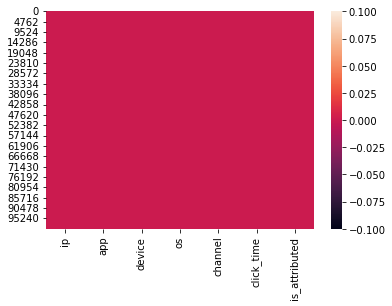

In [11]:
sns.heatmap(df.isnull())

<AxesSubplot:>

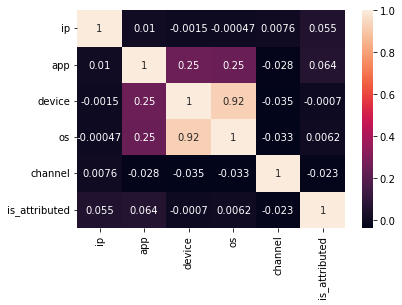

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [15]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [16]:
df['is_attributed'].unique()

array([0, 1], dtype=int64)

In [17]:
df['device'].unique()

array([   1,    2, 3866,    0, 3032, 3543,    7,   40,  385,   56, 3282,
        103,   16,   21,   30,    4,   59,   33,  211,   20,    5,  883,
        154,  607,  957,   37,  102,  124, 2429,   50,  116,   18,  579,
        188,   74,  291,   36, 1482,  347,  160,   25,  486,  516,   97,
        321,  196,  581,   53,  828,  114,  109,    6,  414,  351,   60,
        106, 3867, 1422,  210,  374,   76,  182,  129,   79,  362,  100,
       1728, 2120, 1318,  386,  558,  180,  167,  202,   17,  203, 1162,
        657,   78,    9, 3545, 1839,  420, 2980,  552,   67, 1080,   11,
       3331,  329,  596,  163,  549,   58,  268,  928,  220,   49, 1042,
        241], dtype=int64)

In [18]:
#df[['date','time']]=df['click_time'].str.split(' ',expand=True)

In [19]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [20]:
#df=df.drop('click_time',axis=1)

In [21]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


# Outliers Deletion

<AxesSubplot:xlabel='ip'>

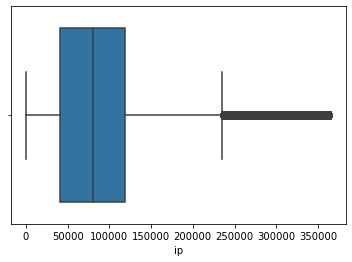

In [22]:
# LET'S SEE OUTLIER of IP

#plt.figure(figsize=(10,10))
sns.boxplot(x='ip',data=df)

C:\Users\saura\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ip', ylabel='Density'>

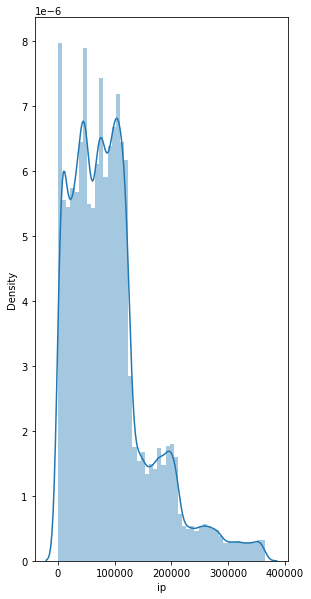

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(df['ip'])

In [24]:
skew_of_ip=df['ip'].skew()

In [25]:
skew_of_ip

1.2967723457954763

In [26]:
mean=df['ip'].mean()

In [27]:
mean

91255.87967

In [28]:
std_dev=df['ip'].std()

In [29]:
std_dev

69835.55366125178

In [30]:
upper_limit=mean + 3 * std_dev

In [31]:
upper_limit

300762.5406537553

In [32]:
lower_limit=mean-3* std_dev


In [33]:
lower_limit

-118250.78131375532

In [34]:
# capping
df['ip'] = np.where(
            df['ip']>upper_limit,
            upper_limit,
            np.where(
            df['ip']<lower_limit,
            lower_limit,
            df['ip']))

In [35]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540.0,12,1,13,497,2017-11-07 09:30:38,0
1,105560.0,25,1,17,259,2017-11-07 13:40:27,0
2,101424.0,12,1,19,212,2017-11-07 18:05:24,0
3,94584.0,13,1,13,477,2017-11-07 04:58:08,0
4,68413.0,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883.0,11,1,19,122,2017-11-09 13:25:41,0
99996,85150.0,9,1,13,244,2017-11-07 11:25:43,0
99997,18839.0,3,1,13,19,2017-11-08 11:38:42,0
99998,114276.0,15,1,12,245,2017-11-08 17:55:21,0


<AxesSubplot:xlabel='app'>

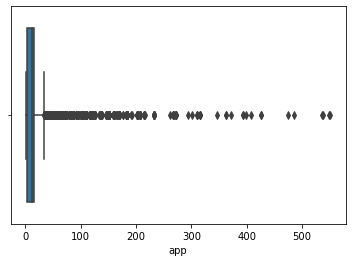

In [36]:
#outlier of app
sns.boxplot(x='app',data=df)

C:\Users\saura\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='app', ylabel='Density'>

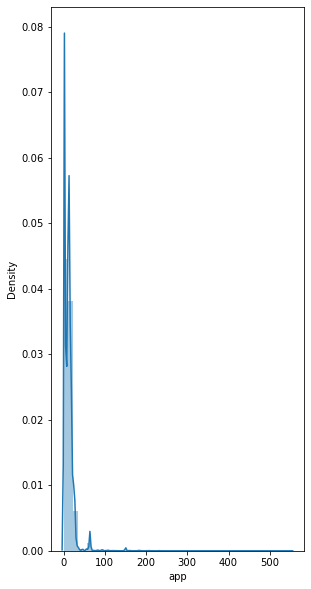

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(df['app'])

In [38]:
skew_of_app=df['app'].skew()

In [39]:
skew_of_app

9.557741407972252

In [40]:
mean=df['app'].mean()

In [41]:
mean

12.04788

In [42]:
std_dev=df['app'].std()

In [43]:
std_dev


14.941499924362846

In [44]:
upper_limit=mean + 3 * std_dev
upper_limit

56.87237977308854

In [45]:
lower_limit=mean  -3 * std_dev

In [46]:
lower_limit

-32.77661977308854

In [47]:
# capping
df['app'] = np.where(
            df['app']>upper_limit,
            upper_limit,
            np.where(
            df['app']<lower_limit,
            lower_limit,
            df['app']))

In [48]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540.0,12.0,1,13,497,2017-11-07 09:30:38,0
1,105560.0,25.0,1,17,259,2017-11-07 13:40:27,0
2,101424.0,12.0,1,19,212,2017-11-07 18:05:24,0
3,94584.0,13.0,1,13,477,2017-11-07 04:58:08,0
4,68413.0,12.0,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883.0,11.0,1,19,122,2017-11-09 13:25:41,0
99996,85150.0,9.0,1,13,244,2017-11-07 11:25:43,0
99997,18839.0,3.0,1,13,19,2017-11-08 11:38:42,0
99998,114276.0,15.0,1,12,245,2017-11-08 17:55:21,0


<AxesSubplot:xlabel='device'>

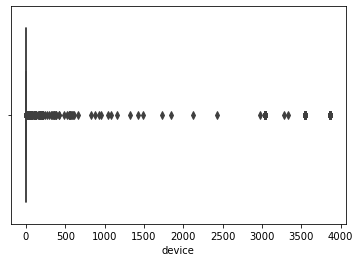

In [49]:
#outlier of device
sns.boxplot(x='device',data=df)

C:\Users\saura\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='device', ylabel='Density'>

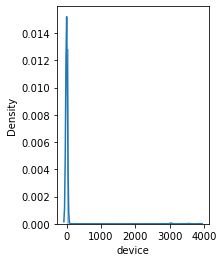

In [50]:

plt.subplot(1,2,1)
sns.distplot(df['device'])

In [51]:
mean=df['device'].mean()

In [52]:
mean

21.77125

In [53]:
std_dev=df['device'].mean()

In [54]:
std_dev

21.77125

In [55]:
upper_limit=mean + 3 * std_dev
upper_limit

87.085

In [56]:
lower_limit=mean - 3 * std_dev
lower_limit

-43.542500000000004

In [57]:
# capping
df['device'] = np.where(
            df['device']>upper_limit,
            upper_limit,
            np.where(
            df['device']<lower_limit,
            lower_limit,
            df['device']))

In [58]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540.0,12.0,1.0,13,497,2017-11-07 09:30:38,0
1,105560.0,25.0,1.0,17,259,2017-11-07 13:40:27,0
2,101424.0,12.0,1.0,19,212,2017-11-07 18:05:24,0
3,94584.0,13.0,1.0,13,477,2017-11-07 04:58:08,0
4,68413.0,12.0,1.0,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883.0,11.0,1.0,19,122,2017-11-09 13:25:41,0
99996,85150.0,9.0,1.0,13,244,2017-11-07 11:25:43,0
99997,18839.0,3.0,1.0,13,19,2017-11-08 11:38:42,0
99998,114276.0,15.0,1.0,12,245,2017-11-08 17:55:21,0


<AxesSubplot:xlabel='os'>

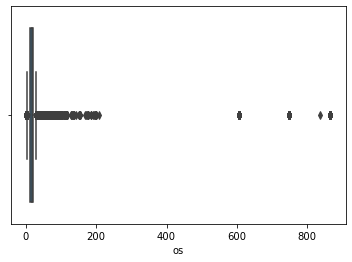

In [59]:
#let's see outlier of os
sns.boxplot(x='os',data=df)

C:\Users\saura\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='device', ylabel='Density'>

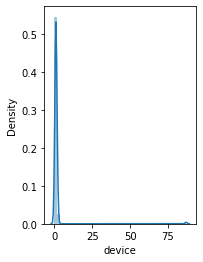

In [60]:
plt.subplot(1,2,1)
sns.distplot(df['device'])

In [61]:
mean=df['os'].mean()

In [62]:
mean

22.81828

In [63]:
std_dev=df['os'].mean()

In [64]:
std_dev

22.81828

In [65]:
upper_limit=mean + 3 * std_dev
upper_limit

91.27312

In [66]:
lower_limit=mean - 3 * std_dev
lower_limit

-45.63656

In [67]:
# capping
df['os'] = np.where(
            df['os']>upper_limit,
            upper_limit,
            np.where(
            df['os']<lower_limit,
            lower_limit,
            df['os']))

In [68]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540.0,12.0,1.0,13.0,497,2017-11-07 09:30:38,0
1,105560.0,25.0,1.0,17.0,259,2017-11-07 13:40:27,0
2,101424.0,12.0,1.0,19.0,212,2017-11-07 18:05:24,0
3,94584.0,13.0,1.0,13.0,477,2017-11-07 04:58:08,0
4,68413.0,12.0,1.0,1.0,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883.0,11.0,1.0,19.0,122,2017-11-09 13:25:41,0
99996,85150.0,9.0,1.0,13.0,244,2017-11-07 11:25:43,0
99997,18839.0,3.0,1.0,13.0,19,2017-11-08 11:38:42,0
99998,114276.0,15.0,1.0,12.0,245,2017-11-08 17:55:21,0


<AxesSubplot:xlabel='channel'>

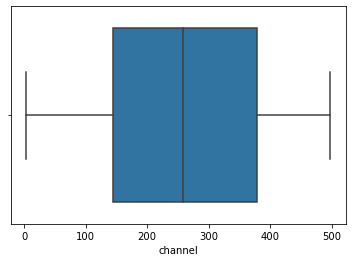

In [69]:
# lets see outlier od channel
sns.boxplot(x='channel',data=df)

In [70]:
df

,ip,app,device,os,channel,click_time,is_attributed
0,87540.0,12.0,1.0,13.0,497,2017-11-07 09:30:38,0
1,105560.0,25.0,1.0,17.0,259,2017-11-07 13:40:27,0
2,101424.0,12.0,1.0,19.0,212,2017-11-07 18:05:24,0
3,94584.0,13.0,1.0,13.0,477,2017-11-07 04:58:08,0
4,68413.0,12.0,1.0,1.0,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883.0,11.0,1.0,19.0,122,2017-11-09 13:25:41,0
99996,85150.0,9.0,1.0,13.0,244,2017-11-07 11:25:43,0
99997,18839.0,3.0,1.0,13.0,19,2017-11-08 11:38:42,0
99998,114276.0,15.0,1.0,12.0,245,2017-11-08 17:55:21,0


In [71]:
# Creating datetime variables
# takes in a df, adds date/time based columns to it, and returns the modified df
def timeFeatures(df):
    # Derive new features using the click_time column
    df['datetime'] = pd.to_datetime(df['click_time'])
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df["day_of_year"] = df["datetime"].dt.dayofyear
    df["month"] = df["datetime"].dt.month
    df["hour"] = df["datetime"].dt.hour
    return df

In [72]:
# creating new datetime variables and dropping the old ones
train_sample = timeFeatures(df)
train_sample.drop(['click_time', 'datetime'], axis=1, inplace=True)
train_sample.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540.0,12.0,1.0,13.0,497,0,1,311,11,9
1,105560.0,25.0,1.0,17.0,259,0,1,311,11,13
2,101424.0,12.0,1.0,19.0,212,0,1,311,11,18
3,94584.0,13.0,1.0,13.0,477,0,1,311,11,4
4,68413.0,12.0,1.0,1.0,178,0,3,313,11,9


In [75]:
x=df.drop('is_attributed',axis=1)

In [76]:
x

,ip,app,device,os,channel,day_of_week,day_of_year,month,hour
0,87540.0,12.0,1.0,13.0,497,1,311,11,9
1,105560.0,25.0,1.0,17.0,259,1,311,11,13
2,101424.0,12.0,1.0,19.0,212,1,311,11,18
3,94584.0,13.0,1.0,13.0,477,1,311,11,4
4,68413.0,12.0,1.0,1.0,178,3,313,11,9
...,...,...,...,...,...,...,...,...,...
99995,124883.0,11.0,1.0,19.0,122,3,313,11,13
99996,85150.0,9.0,1.0,13.0,244,1,311,11,11
99997,18839.0,3.0,1.0,13.0,19,2,312,11,11
99998,114276.0,15.0,1.0,12.0,245,2,312,11,17


In [78]:
y=df['is_attributed']

In [79]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

In [82]:
# Import Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier

In [83]:
tree=DecisionTreeClassifier(max_depth=2)
                                    

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [103]:
# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=500,
    learning_rate=1.5,
    algorithm="SAMME")

In [104]:
adaboost_model_1.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=500)

In [105]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(x_test)
predictions[:10]

array([[0.53949911, 0.46050089],
       [0.53275317, 0.46724683],
       [0.55545936, 0.44454064],
       [0.52193957, 0.47806043],
       [0.53201275, 0.46798725],
       [0.52871492, 0.47128508],
       [0.53217163, 0.46782837],
       [0.53190482, 0.46809518],
       [0.53036566, 0.46963434],
       [0.5294284 , 0.4705716 ]])

In [106]:
# metrics: AUC
from sklearn import metrics
metrics.roc_auc_score(y_test, predictions[:,1])

0.9583908237979899

In [107]:
x=np.array([[[1,2,3],[2,4,5],[3,7,8]]])

In [108]:
x

array([[[1, 2, 3],
        [2, 4, 5],
        [3, 7, 8]]])

In [101]:
x.shape

(1, 3, 3)

In [102]:
x.ndim

3